# EDA

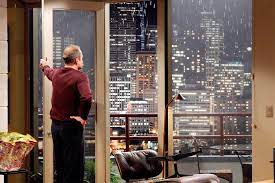

# Preparation



First, necessary libraries and the dataset of King County house sales will be imported.

In [40]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium #needed for geoplot
from folium.plugins import HeatMap


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)



In [41]:
df = pd.read_csv('data/eda.csv') #import dataset
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,,0.0,3,7,...,0.0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.0,0.0,3,7,...,19910.0,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.0,0.0,3,6,...,,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.0,0.0,5,7,...,0.0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.0,0.0,3,8,...,0.0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [42]:
df.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
21592,263000018,3.000,2.500,1530.000,1131.000,3.000,0.0,0.0,3,8,...,0.0,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018,21593
21593,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.0,0.0,3,8,...,0.0,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120,21594
21594,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.0,0.0,3,7,...,0.0,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141,21595
21595,291310100,3.000,2.500,1600.000,2388.000,2.000,,0.0,3,8,...,0.0,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100,21596
21596,1523300157,2.000,0.750,1020.000,1076.000,2.000,0.0,0.0,3,7,...,0.0,98144,47.594,-122.299,1020.000,1357.000,2014-10-15,325000.000,1523300157,21597


In [43]:
df.columns

Index(['id         ', 'bedrooms ', 'bathrooms ', 'sqft_living ', 'sqft_lot  ',
       'floors ', 'waterfront ', 'view ', 'condition ', 'grade ',
       'sqft_above ', 'sqft_basement ', 'yr_built ', 'yr_renovated ',
       'zipcode ', 'lat     ', 'long       ', 'sqft_living15 ', 'sqft_lot15 ',
       'date       ', 'price     ', 'house_id   ', 'id'],
      dtype='object')

Some of the column names contain empty spaces, which have to be removed. Unique ID of the house is redundant (first columns and 22nd column) and one can be removed. 'id' (23nd column), which is the sale id is not needed for the analysis and can be dropped as well.

In [44]:
#remove empty spaces in column names
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id'],
      dtype='object')

In [45]:
# drop redundant column of unique house ID

df.drop(df.columns[0], axis =1, inplace=True)
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
0,3.000,1.000,1180.000,5650.000,1.000,,0.0,3,7,1180.000,...,1955,0.0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520
1,3.000,2.250,2570.000,7242.000,2.000,0.0,0.0,3,7,2170.000,...,1951,19910.0,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192
2,2.000,1.000,770.000,10000.000,1.000,0.0,0.0,3,6,770.000,...,1933,,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400
3,4.000,3.000,1960.000,5000.000,1.000,0.0,0.0,5,7,1050.000,...,1965,0.0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875
4,3.000,2.000,1680.000,8080.000,1.000,0.0,0.0,3,8,1680.000,...,1987,0.0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510


Explanation of individual variables for King County Data Set

|Columns name | Description |
|---- | ------------- |
|house_id|unique identified for a house|
|date | house was sold|
|price| is prediction target|
|bedroomsNumber| # of bedrooms|
|bathroomsNumber| # of bathrooms|
|sqft_livingsquare|footage of the home|
|sqft_lotsquare|footage of the lot|
|floorsTotal|floors (levels) in house|
|waterfront| House which has a view to a waterfront|
|view| quality of view|
|condition| How good the condition is ( Overall )|
|grade| overall grade given to the housing unit, based on King County grading system|
|sqft_above|square footage of house apart from basement|
|sqft_basement|square footage of the basement|
|yr_built|Built Year|
|yr_renovated|Year when house was renovated|
|zipcode| zip|
|lat|Latitude coordinate|
|long|Longitude coordinate|
|sqft_living15|The square footage of interior housing living space for the nearest 15 neighbors|
|sqft_lot15|The square footage of the land lots of the nearest 15 neighbors|

In [47]:
df.shape

(21597, 21)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  float64
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  float64
 3   sqft_lot       21597 non-null  float64
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  object 
 6   view           21597 non-null  object 
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  float64
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  object 
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  float64
 17  sqft_lot15     21597 non-null  float64
 18  date  

Some datatypes have to be changed for analysis: sqft_basement to float64, yr_renovated to Datetime, yr_built to Date, Date to Datetime

In [53]:
# sqft_basement to float 64

df['sqft_basement'] = df['sqft_basement'].astype(float)

df.sqft_basement.head()

0     0.000
1   400.000
2     0.000
3   910.000
4     0.000
Name: sqft_basement, dtype: float64

In [ ]:
# Don't know if this is still needed

# yr_renovated columns converted to string 
#df2['yr_renovated'] = df2['yr_renovated'].astype(str)
#extract first 4 character as year
#df2['yr_renovated'] = df2['yr_renovated'].str.extract(r'(\d{4})')
#replace empty strings with zeros
#df2['yr_renovated'].replace('', '0', inplace=True)
# convert year to datetime
#df2['yr_renovated'] = pd.to_datetime(df2['yr_renovated'], format='%Y', errors='coerce')
#df2.head()

In [55]:
# transform yr_built to date

df['yr_built'] = df['yr_built'].astype(str).str[:4]
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y', errors='coerce')
df.yr_built.head()


0   1955-01-01
1   1951-01-01
2   1933-01-01
3   1965-01-01
4   1987-01-01
Name: yr_built, dtype: datetime64[ns]

In [56]:
#transform date to Datetime format

df['date'] = pd.to_datetime(df['date'], format='mixed')

df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [ ]:
# Check for Duplicates in house_id 

df.house_id.duplicated().value_counts()

house_id
False    21420
True       177
Name: count, dtype: int64

There are 177 duplicates in house_id, which means that some houses were frequently sold (probably just bought as an investment). Duplicates won't be removed from data.

In [57]:
df.condition.unique()

array([3, 5, 4, 1, 2])

In [58]:
df.isna().sum()

bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    452
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
date               0
price              0
house_id           0
dtype: int64

In [60]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21145.000,21597,21597.000,21597.000,21597.000,21597.000,21597.000,21597,21597.000,21597.000
mean,3.373,2.116,2080.322,15099.409,1.494,3.410,7.658,1788.597,291.857,1971-01-01 00:15:16.127239876,98077.952,47.560,-122.214,1986.620,12758.284,2014-10-29 04:20:38.171968512,540296.574,4580474287.771
min,1.000,0.500,370.000,520.000,1.000,1.000,3.000,370.000,0.000,1900-01-01 00:00:00,98001.000,47.156,-122.519,399.000,651.000,2014-05-02 00:00:00,78000.000,1000102.000
25%,3.000,1.750,1430.000,5040.000,1.000,3.000,7.000,1190.000,0.000,1951-01-01 00:00:00,98033.000,47.471,-122.328,1490.000,5100.000,2014-07-22 00:00:00,322000.000,2123049175.000
50%,3.000,2.250,1910.000,7618.000,1.500,3.000,7.000,1560.000,0.000,1975-01-01 00:00:00,98065.000,47.572,-122.231,1840.000,7620.000,2014-10-16 00:00:00,450000.000,3904930410.000
75%,4.000,2.500,2550.000,10685.000,2.000,4.000,8.000,2210.000,560.000,1997-01-01 00:00:00,98118.000,47.678,-122.125,2360.000,10083.000,2015-02-17 00:00:00,645000.000,7308900490.000
max,33.000,8.000,13540.000,1651359.000,3.500,5.000,13.000,9410.000,4820.000,2015-01-01 00:00:00,98199.000,47.778,-121.315,6210.000,871200.000,2015-05-27 00:00:00,7700000.000,9900000190.000
std,0.926,0.769,918.106,41412.637,0.540,0.651,1.173,827.760,442.491,NaN,53.513,0.139,0.141,685.230,27274.442,NaN,367368.140,2876735715.748


In [59]:

df.price.describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

The middle range price will be defined by the IQR (interquartile range) and would range from 322000 (25% quartile) to 645000 (75% quartile).

**Boxplot price range**

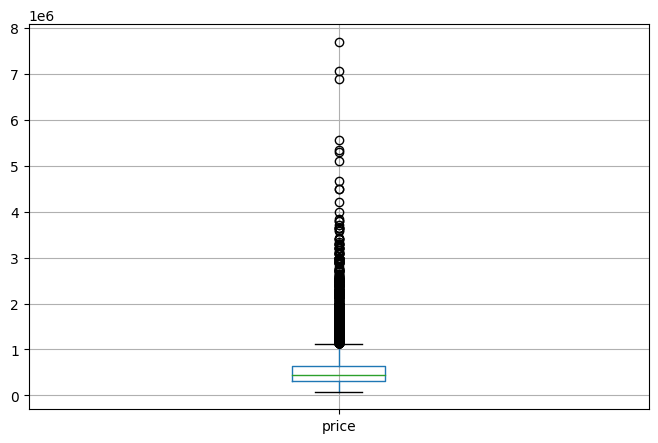

In [61]:
df.boxplot(column = 'price')
plt.show()

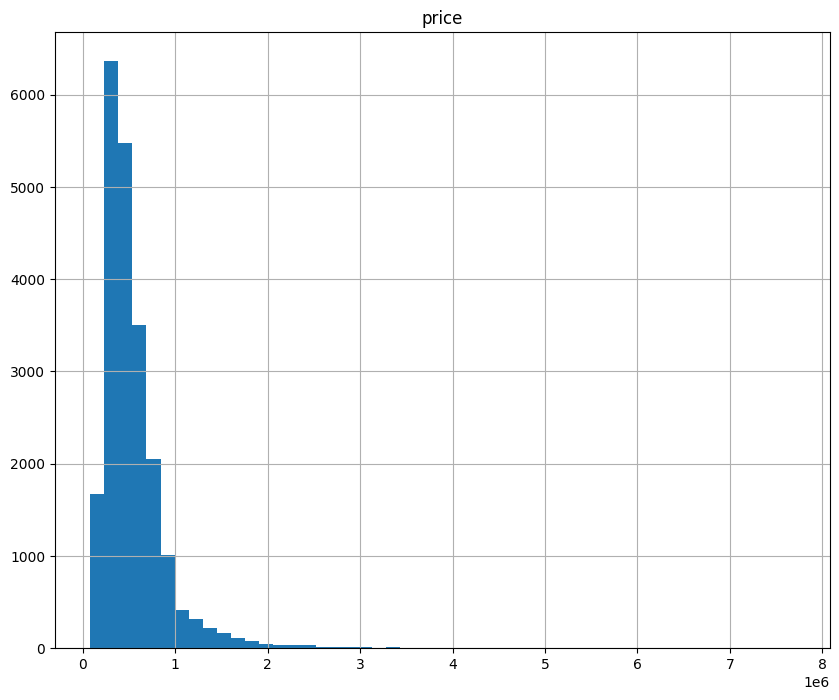

In [69]:
#make it nice/ change axes!
df.hist(column = 'price', bins = 50, figsize = (10, 8))
plt.show()


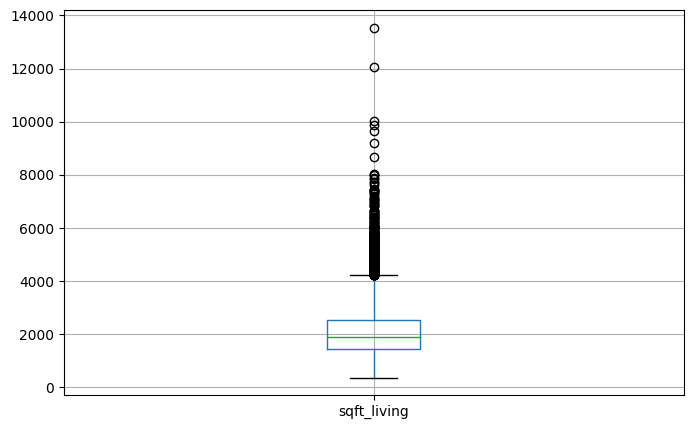

In [62]:
df.boxplot(column = 'sqft_living')
plt.show()

In [ ]:
# price development over year

price_dev = df2.groupby('house_id')
price_dev.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat_coordinate,long_coordinate,sqft_living15,sqft_lot15,date,price,house_id,sale_id
0,3.000,1.000,1180.000,5650.000,1.000,,0.0,3,7,1180.000,...,0.0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,3.000,2.250,2570.000,7242.000,2.000,0.0,0.0,3,7,2170.000,...,19910.0,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,2.000,1.000,770.000,10000.000,1.000,0.0,0.0,3,6,770.000,...,,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,4.000,3.000,1960.000,5000.000,1.000,0.0,0.0,5,7,1050.000,...,0.0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,3.000,2.000,1680.000,8080.000,1.000,0.0,0.0,3,8,1680.000,...,0.0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3.000,2.500,1530.000,1131.000,3.000,0.0,0.0,3,8,1530.000,...,0.0,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018,21593
21593,4.000,2.500,2310.000,5813.000,2.000,0.0,0.0,3,8,2310.000,...,0.0,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120,21594
21594,2.000,0.750,1020.000,1350.000,2.000,0.0,0.0,3,7,1020.000,...,0.0,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141,21595
21595,3.000,2.500,1600.000,2388.000,2.000,,0.0,3,8,1600.000,...,0.0,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100,21596


In [ ]:
houses_under_640K = df2.query ('price <= 645000')
houses_under_640K.tail()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat_coordinate,long_coordinate,sqft_living15,sqft_lot15,date,price,house_id,sale_id
21592,3.000,2.500,1530.000,1131.000,3.000,0.0,0.0,3,8,1530.000,...,0.0,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018,21593
21593,4.000,2.500,2310.000,5813.000,2.000,0.0,0.0,3,8,2310.000,...,0.0,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120,21594
21594,2.000,0.750,1020.000,1350.000,2.000,0.0,0.0,3,7,1020.000,...,0.0,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141,21595
21595,3.000,2.500,1600.000,2388.000,2.000,,0.0,3,8,1600.000,...,0.0,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100,21596
21596,2.000,0.750,1020.000,1076.000,2.000,0.0,0.0,3,7,1020.000,...,0.0,98144,47.594,-122.299,1020.000,1357.000,2014-10-15,325000.000,1523300157,21597


In [ ]:
df2.price.describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [ ]:
df2.sqft_living.describe()

count   21597.000
mean     2080.322
std       918.106
min       370.000
25%      1430.000
50%      1910.000
75%      2550.000
max     13540.000
Name: sqft_living, dtype: float64

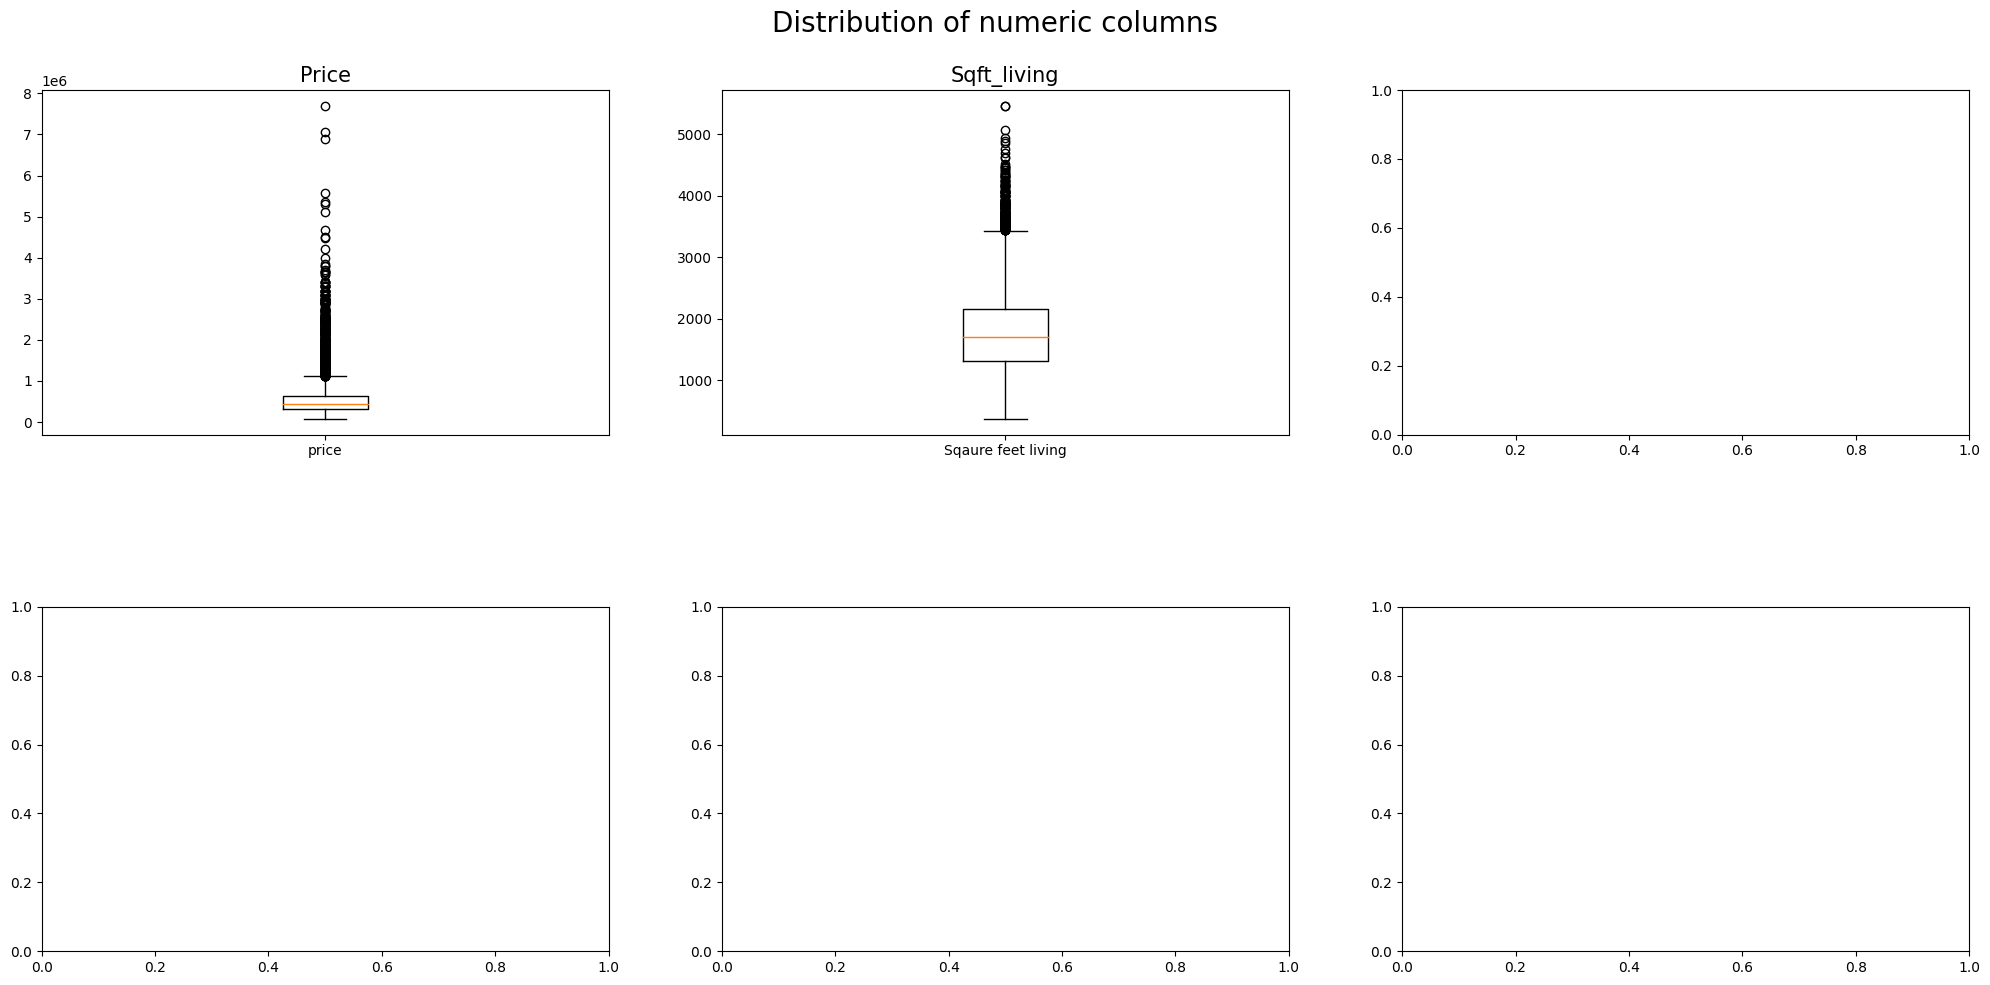

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots


ax[0][0].boxplot(x = df2['price']) # creates boxplot for number of views
ax[0][0].set_xticklabels(labels=["price"]) # sets the label for the ticks on the x-axis
#ax[0][0].set_ylim(0,1000000) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_title("Price", fontsize = 15); # sets title for subplot


ax[0][1].boxplot(x = houses_under_640K['sqft_living'])
ax[0][1].set_xticklabels(labels=["Sqaure feet living"])
#ax[0][1].set_ylim(0,50000)
ax[0][1].set_title("Sqft_living", fontsize = 15);


***Distribution of continous variables***

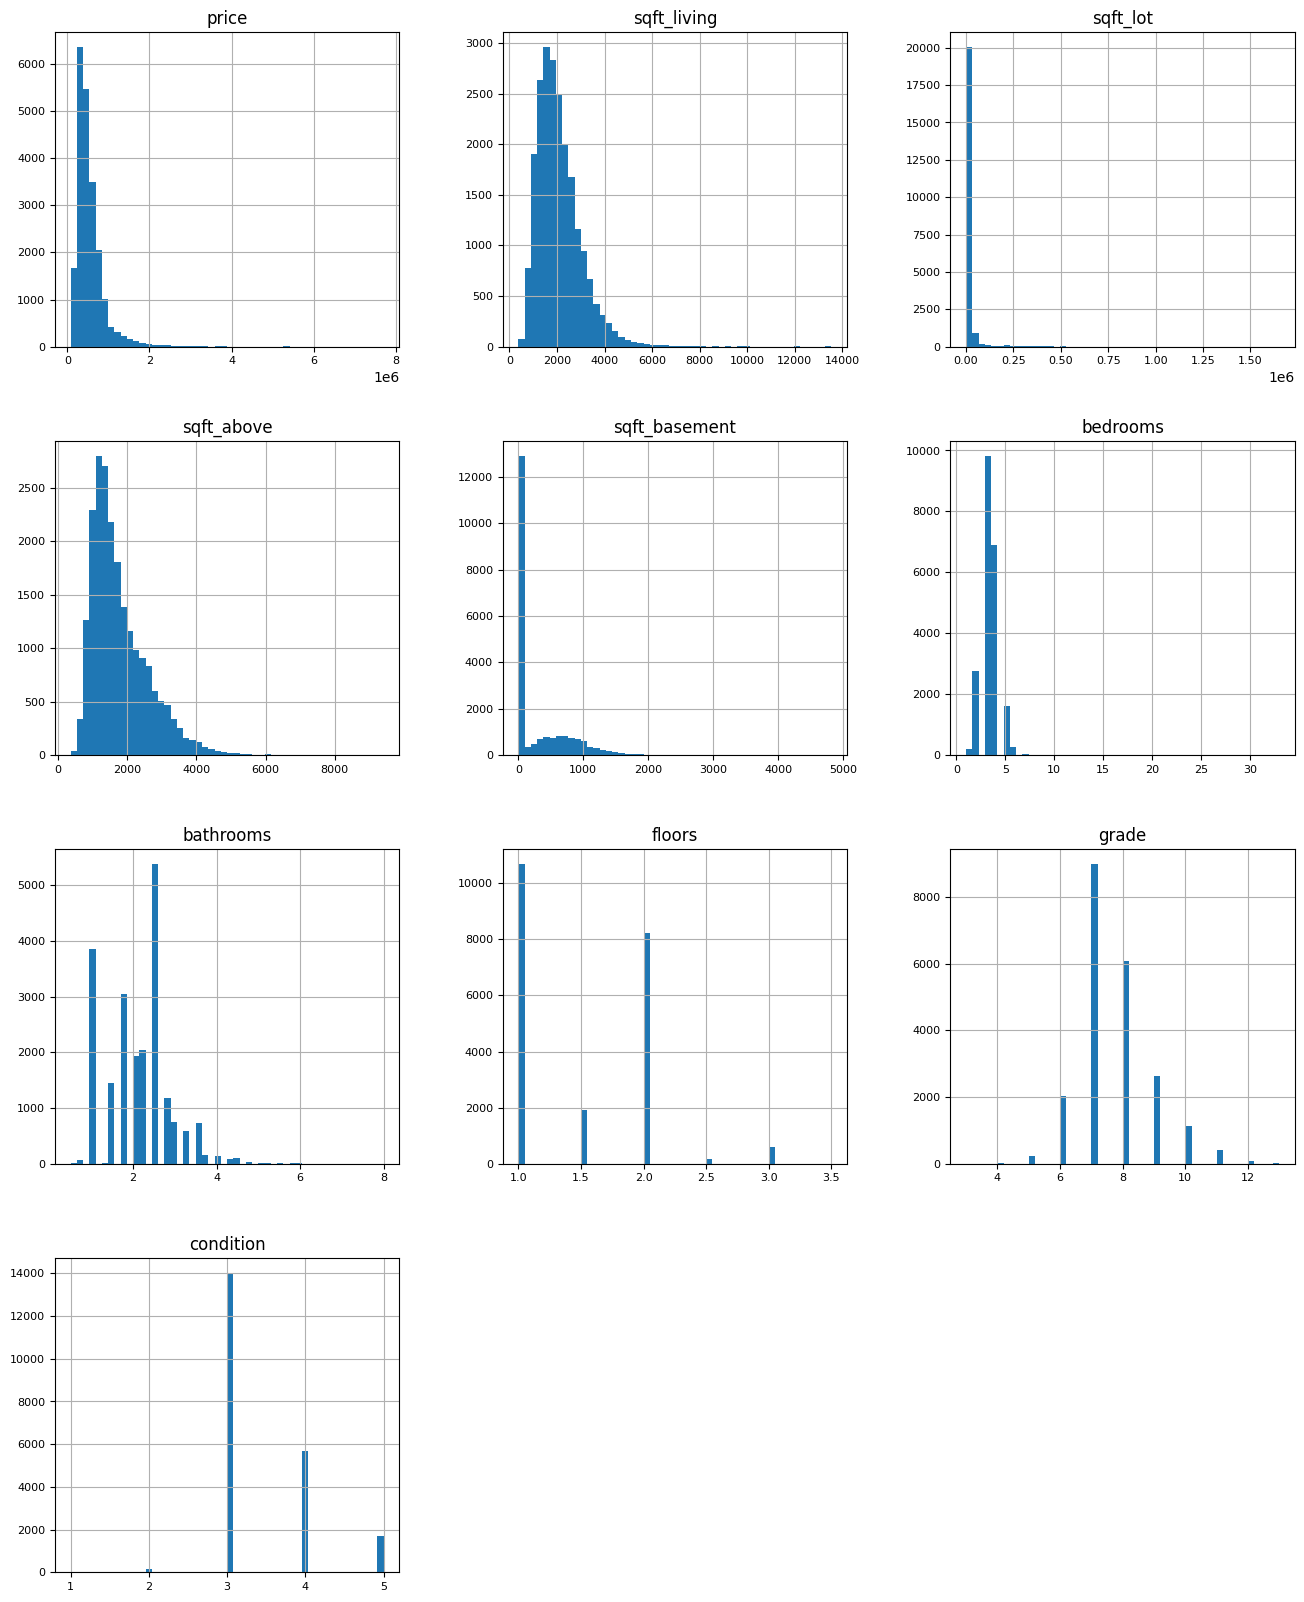

In [83]:
#select columns of interest
columns_of_interest = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'grade', 'condition']

# Plot histograms
df[columns_of_interest].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

***Which features are correlated with the price?***

In [ ]:
columns_of_interest_corr = 

In [ ]:
df2.zipcode.nunique()

70

***Hypotheses***

| Question | Hyothesis |
| ---------|-----------|
| Does timing affect the price ?| House prices fluctuate over the year and are the lowest in season with low number of solds|
|Which lively and central area is still affordable for a budget in middle price range?| Lively and central areas with lower house conditions/grading are more affordable|
|Which standards can be expected from a middle-priced house in a lively and central area?| affordable houses will be small/non-renovated/no basement|

***What is needed from dataset***


* define budget for middle price class --> take interquartile of prices?
* define which area is lively and central (select zipcodes of central areas, select areas with high density) sqft_lot15 The square footage of the land lots of the nearest 15 neighbors small means that density is high
* Select only houses that are in the price range --> show areas that are affordable 
* show price by condition and grading (grouped by zipcode of central/lively area)
* groupby zipcode, plot house prices by date (linear plot --> x dates) --> get an overview if prices fluctuate
* group dates by month and plot prices --> to recommand in which month/season it is better to buy
* show plots of price by square_living, basement, number of bedrooms e.g.

***Price distribution***

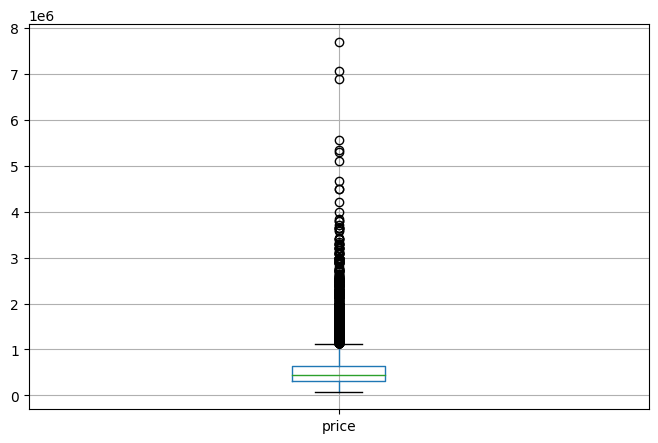

In [ ]:
df2.boxplot(column = 'price')
plt.show()

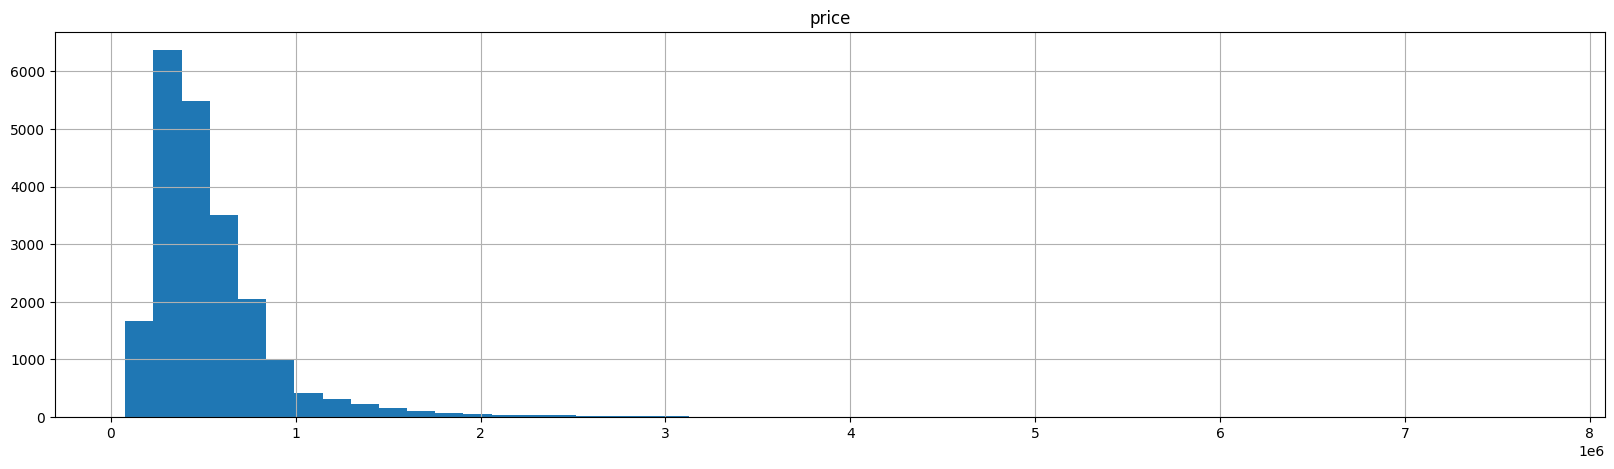

In [ ]:
df2.hist(column = 'price', bins = 50, figsize = (20, 5))
plt.show()


Many outliers, price range is huge. Distribution of house prices is positively skewed

***Overview of all features that correlate with the price***

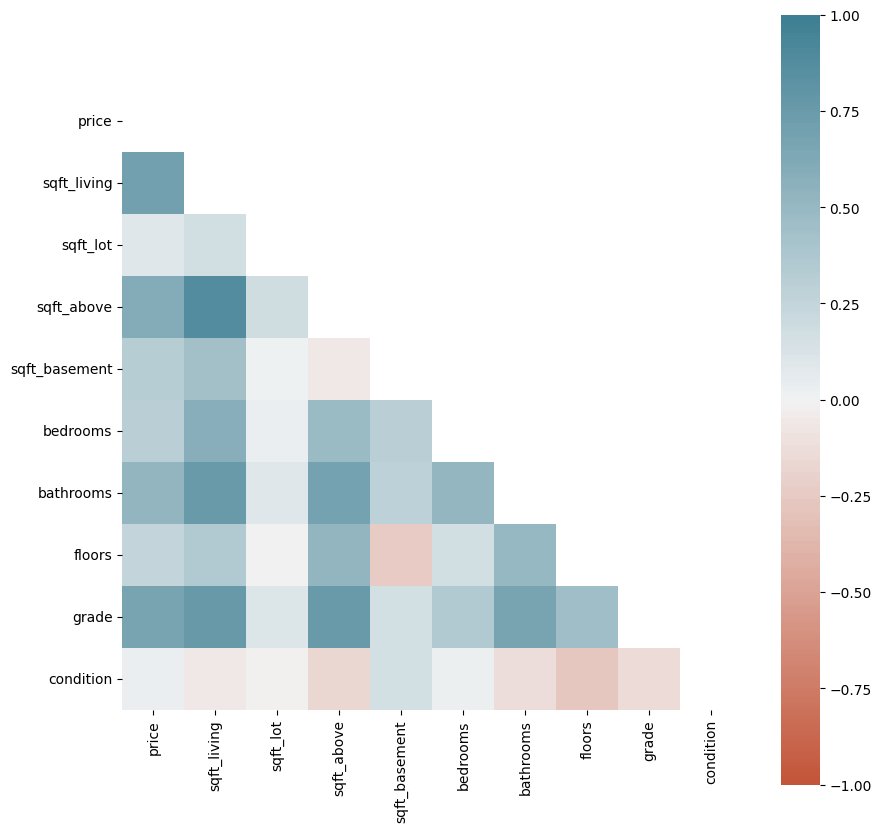

In [84]:
# Calculate correlation matrix
data_corr = df[columns_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10,10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corr, 
            mask=mask,
            xticklabels=data_corr.columns.values, # x labels
            yticklabels=data_corr.columns.values, # y labels
            vmin=-1, # color scale the min value
            vmax=1, # color scale the max
            center=0, # color scale place at the center at 0
            cmap=sns.diverging_palette(20, 220, n=200), # color palette
            square=True) # each cell will be square-shaped

plt.show()

Price highly correlates with sqft_living, sgft_above, grade. As most hpuse do not have a base,ent, sqft_living positively correlated wth sgft_above. 

***Scatter plots to show relation***

# Select only houses that are of interest for the client

* select middle price class --> take interquartile of prices
* define which area is lively and central (select zipcodes of central areas, select areas with high density) sqft_lot15 The square footage of the land lots of the nearest 15 neighbors small means that density is high
* Select only houses that are in the price range --> show areas that are affordable 
* show price by condition and grading (grouped by zipcode of central/lively area)
* groupby zipcode, plot house prices by date (linear plot --> x dates) --> get an overview if prices fluctuate
* group dates by month and plot prices --> to recommand in which month/season it is better to buy
* show plots of price by square_living, basement, number of bedrooms e.g.

In [89]:
# houses in middle price class

# Calculate the lower and upper quartiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for the IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Select houses within the interquartile range
df_middle_price = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


<class 'pandas.core.frame.DataFrame'>
Index: 20439 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   bedrooms       20439 non-null  float64       
 1   bathrooms      20439 non-null  float64       
 2   sqft_living    20439 non-null  float64       
 3   sqft_lot       20439 non-null  float64       
 4   floors         20439 non-null  float64       
 5   waterfront     20439 non-null  object        
 6   view           20439 non-null  object        
 7   condition      20439 non-null  int64         
 8   grade          20439 non-null  int64         
 9   sqft_above     20439 non-null  float64       
 10  sqft_basement  20009 non-null  float64       
 11  yr_built       20439 non-null  datetime64[ns]
 12  yr_renovated   20439 non-null  object        
 13  zipcode        20439 non-null  int64         
 14  lat            20439 non-null  float64       
 15  long           20439 non

In [90]:
df.lat.head()

0   47.511
1   47.721
2   47.738
3   47.521
4   47.617
Name: lat, dtype: float64

In [92]:
df.long.head()

0   -122.257
1   -122.319
2   -122.233
3   -122.393
4   -122.045
Name: long, dtype: float64

Find central areas. Definition of central areas: radius of 

In [101]:
# Find central areas

#using geopy library to calculate distances between zipcodes and the city center (pre-defined city center by coodinates)

from geopy.distance import distance 

#Define coordinates of the city center 
city_center_coordinates = (47.620564, -122.350616 )


# Calculation of distance between two coordinates
def calc_dist(house_coordinates):
    return distance(city_center_coordinates, house_coordinates).miles

# Iterate through dataset and filter houses close to the city center
central_houses = []
for index, row in df.iterrows():
    house_coordinates = (row['lat'], row['long'])
    distance_to_city_center = calc_dist(house_coordinates)
    if distance_to_city_center <= 3:
        central_houses.append(row)

#convert to DataFrame
central_houses_df = pd.DataFrame(central_houses)
central_houses_df.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
26,3.000,1.750,2450.000,2691.000,2.000,0.0,0.0,3,8,1750.000,...,1915-01-01,,98119,47.639,-122.360,1760.000,3573.000,2014-06-26,937000.000,1794500383
27,3.000,1.000,1400.000,1581.000,1.500,0.0,0.0,5,8,1400.000,...,1909-01-01,0.0,98112,47.622,-122.314,1860.000,3861.000,2014-12-01,667000.000,3303700376
43,3.000,1.000,1570.000,2280.000,2.000,0.0,0.0,3,7,1570.000,...,1922-01-01,0.0,98119,47.641,-122.364,1580.000,2640.000,2014-10-28,685000.000,9270200160
64,3.000,2.250,1660.000,6000.000,1.000,0.0,0.0,3,7,1110.000,...,1979-01-01,0.0,98122,47.611,-122.297,1440.000,4080.000,2014-06-03,425000.000,1189001180
85,3.000,1.500,2140.000,3600.000,2.000,0.0,0.0,3,9,1900.000,...,1925-01-01,0.0,98119,47.634,-122.365,2020.000,4800.000,2014-11-14,940000.000,4232902595


In [125]:
# houses in middle price class in the center 

# Calculate the lower and upper quartiles
Q1 = central_houses_df['price'].quantile(0.25)
Q3 = central_houses_df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for the IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Select houses within the interquartile range
central_houses_midprice_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
central_houses_midprice_df.price.describe()


count     20881.000
mean     492634.697
std      232553.427
min       78000.000
25%      318500.000
50%      442000.000
75%      618250.000
max     1340000.000
Name: price, dtype: float64

***Visualization of central houses in Geomap***

***Geomap***
Source: https://github.com/jerrychens/king_county_house_price/blob/master/Final_Jerry.ipynb

In [105]:
# create a base map of Central area of King County  
basemap = folium.Map(location=[central_houses_df['lat'].mean(),central_houses_df['long'].mean()], zoom_start = 11)

# add heatmap to show housing density
coordinate_copy = central_houses_df[['lat','long']].copy()
coordinate_copy['count'] = 1
HeatMap(data = coordinate_copy.groupby(['lat','long']).sum().reset_index().values.tolist()
                       , radius=8, max_zoom=13, name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed = False).add_to(basemap) # turn off the heatmap toggle
basemap # render the map

***Select houses that are in a lively area***  

All the areas located around the city center seem to be densely populated.  

Add-on could be to display restaurants/bars and define lively areas around that 

In [129]:
import plotly.express as px

# Create a scatter mapbox plot
fig = px.scatter_mapbox(central_houses_df, 
                        lat='lat', 
                        lon='long',
                        color_continuous_scale=px.colors.sequential.Viridis,  # Define color scale
                        color='price',  # Define color based on density count
                        range_color=[Q1, Q3], #set range of legend based on lower and upper bound
                        size='price',   # Define marker size based on density count
                        hover_name='price',  # Define hover information (density count)
                        hover_data={'lat': False, 'long': False},  # Disable lat and long in hover tooltip
                        mapbox_style='carto-positron',  # Choose mapbox style
                        zoom=10,  # Set initial zoom level
                        center={'lat': central_houses_df['lat'].mean(), 'lon': central_houses_df['long'].mean()},  # Set initial center of the map
                        opacity=0.7,  # Set opacity of markers
                        labels={'house_id': 'Price'})  # Define label for legend

# Update layout to add legend
fig.update_layout(coloraxis_colorbar=dict(title='Price'))  # Add legend title

# Show the plot
fig.show()

In [ ]:


# create a base map of Central area of King County  
basemap = folium.Map(location=[df['lat_coordinate'].mean(),df2['long_coordinate'].mean()], zoom_start = 10)

# add heatmap to show housing density
coordinate_copy = df2[['lat_coordinate','long_coordinate']].copy()
coordinate_copy['count'] = 1
HeatMap(data = coordinate_copy.groupby(['lat_coordinate','long_coordinate']).sum().reset_index().values.tolist()
                       , radius=8, max_zoom=13, name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed = False).add_to(basemap) # turn off the heatmap toggle
basemap # render the map

inspiration here for zipcodes? https://www.kaggle.com/code/saidakbarp/nyc-property-sales-eda-map-analysis/notebook